In [3]:
import io
import os
import pandas as pd

In [4]:
path = 'C:/Users/Hewlett-Packard/Desktop/tumor_vs_normal.manta.somatic.vcf'
def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    return pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str},
        sep='\t'
    ).rename(columns={'#CHROM': 'CHROM'})

In [5]:
df = read_vcf(path)

In [6]:
df.head(10)

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR
0,1,7978032,MantaDUP:TANDEM:1203:0:1:0:0:0,A,<DUP:TANDEM>,.,PASS,"END=8553291;SVTYPE=DUP;SVLEN=575259;CIPOS=0,1;...",PR:SR,"64,0:40,0","51,3:39,2"
1,1,8290812,MantaDEL:1404:0:0:1:0:0,GCTGGAATGCAGTGGCACGATCTTGGCTCACTACAACCTCTGCCTC...,G,.,PASS,END=8291005;SVTYPE=DEL;SVLEN=-193;CIGAR=1M193D...,PR:SR,"55,0:55,0","57,12:44,6"
2,1,11434171,MantaBND:3:17691:17695:0:0:0:0,T,[7:26679271[T,.,MinSomaticScore,SVTYPE=BND;MATEID=MantaBND:3:17691:17695:0:0:0...,PR,"50,0","66,5"
3,1,16871910,MantaBND:2919:0:1:0:0:0:1,A,[1:42662695[A,.,PASS,SVTYPE=BND;MATEID=MantaBND:2919:0:1:0:0:0:0;CI...,PR:SR,"101,0:70,0","119,2:70,7"
4,1,21436180,MantaBND:3740:0:1:0:0:0:1,G,G]12:91074805],.,PASS,SVTYPE=BND;MATEID=MantaBND:3740:0:1:0:0:0:0;CI...,PR:SR,"91,0:62,0","102,2:45,2"
5,1,30962092,MantaBND:3:7626:7635:0:0:0:0,T,T[12:111318334[,.,PASS,SVTYPE=BND;MATEID=MantaBND:3:7626:7635:0:0:0:1...,PR,"80,0","76,8"
6,1,33151833,MantaBND:5840:0:1:0:1:0:0,A,]5:30886167]A,.,PASS,SVTYPE=BND;MATEID=MantaBND:5840:0:1:0:1:0:1;CI...,PR:SR,"76,0:46,0","127,21:70,9"
7,1,35101527,MantaDUP:TANDEM:6233:0:1:0:0:0,T,<DUP:TANDEM>,.,PASS,"END=40610174;SVTYPE=DUP;SVLEN=5508647;CIPOS=0,...",PR:SR,"100,0:37,0","118,10:56,3"
8,1,35390743,MantaDEL:6274:0:1:0:0:0,C,<DEL>,.,PASS,END=44505229;SVTYPE=DEL;SVLEN=-9114486;CIPOS=0...,PR:SR,"77,0:43,0","80,15:41,6"
9,1,35892650,MantaDEL:3:18152:18153:0:0:0,A,<DEL>,.,MinSomaticScore,END=35896082;SVTYPE=DEL;SVLEN=-3432;IMPRECISE;...,PR,"93,0","103,6"


In [121]:
##Q1: Count the total number of variants represented in the form of breakends.

In [7]:
data_BND = df.loc[df['INFO'].str.contains("BND", case=True)]

In [10]:
data_BND.shape

(754, 11)

In [ ]:
##Q2:Make a boxplots of the deletion length per each chromosome.

In [20]:
df3 = df.groupby(["CHROM", "ALT"]).size().reset_index(name="size")

In [21]:
df3.head()

,CHROM,ALT,size
0,1,<DEL>,10
1,1,<DUP:TANDEM>,5
2,1,AAAATTAG]1:173998382],1
3,1,A[10:100583935[,1
4,1,A]13:75118825],1


In [122]:
df4 = df3.loc[df3['ALT'] == '<DEL>']

In [123]:
df4

,CHROM,ALT,size
0,1,<DEL>,10
86,10,<DEL>,7
159,11,<DEL>,5
169,12,<DEL>,7
245,13,<DEL>,1
258,14,<DEL>,6
272,15,<DEL>,3
278,16,<DEL>,3
296,17,<DEL>,5
325,18,<DEL>,1


In [ ]:
##plot representing number of deletions corrosponding to each chromosome

<AxesSubplot:xlabel='CHROM'>

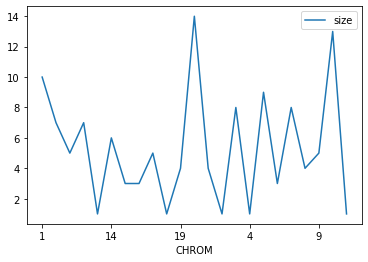

In [23]:
df4.plot(x='CHROM', y='size') 

In [ ]:
###Q3:Count how many variants failed to pass the filtering. Make a piechart of most frequent reasons to fail.

In [11]:
filter_pass = df.groupby(['FILTER'], sort=False).size().reset_index(name='Count')

In [12]:
filter_pass.head()

,FILTER,Count
0,PASS,642
1,MinSomaticScore,321
2,MaxDepth,13
3,MaxMQ0Frac,1


<AxesSubplot:ylabel='Count'>

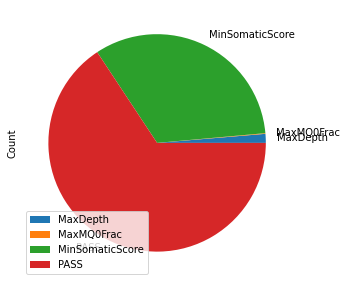

In [19]:
filter_pass.groupby(['FILTER']).sum().plot(kind='pie', y='Count', figsize=(5,5))

In [ ]:
## The most frequent reason is minimumsomaticscore

In [ ]:
##Q4:  Find the variant with the widest confidence interval around POS;

In [107]:
extracted = df.INFO.str.extract(r'(?P<Str>CIPOS=[^;]+)')

In [108]:
new = extracted["Str"].str.split("=", n = 1, expand = True)

In [109]:
extracted["diff"]= new[1]

In [110]:
new2 = extracted["diff"].str.split(",", n=1,  expand = True)

In [111]:
extracted["diff2"]= new2[0]

In [ ]:
extracted["diff1"]= new2[1]
extracted["diff1"]

In [115]:
extracted = extracted[~extracted['diff2'].isnull()]
extracted = extracted[extracted['diff2'].str.isnumeric()]
extracted = extracted[~extracted['diff1'].isnull()]
extracted = extracted[extracted['diff1'].str.isnumeric()]

In [119]:
extracted['diff'] = extracted['diff1'].astype(int) - extracted['diff2'].astype(int)

In [120]:
extracted.sort_values(by='diff', ascending=False)

,Str,diff,diff2,diff1
839,"CIPOS=0,32",32,0,32
838,"CIPOS=0,32",32,0,32
261,"CIPOS=0,28",28,0,28
365,"CIPOS=0,26",26,0,26
783,"CIPOS=0,26",26,0,26
...,...,...,...,...
351,"CIPOS=0,1",1,0,1
724,"CIPOS=0,1",1,0,1
339,"CIPOS=0,1",1,0,1
730,"CIPOS=0,1",1,0,1


In [ ]:
##Q4 What type of stractural variant represented by ID MantaBND:28842:0:1:0:0:0:0

In [16]:
SV_ID = df.loc[df['ID'] == 'MantaBND:28842:0:1:0:0:0:0']

In [17]:
SV_ID

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR
60,1,149603639,MantaBND:28842:0:1:0:0:0:0,T,T]X:20306777],.,PASS,SVTYPE=BND;MATEID=MantaBND:28842:0:1:0:0:0:1;C...,PR:SR,"52,0:42,0","104,5:75,9"


In [ ]:
## TYPE BND (breakends)